## Hotel Reviews Classifier Using Bidirectional LSTM



In [37]:
import pandas as pd
import numpy as np

import re
import nltk
from nltk.corpus import stopwords
import nltk as nlp

import joblib

In [38]:
df = pd.read_csv('All_reviews.csv')

In [39]:
df.head()

,All_Review,Reviewer_Score
0,angry made post available via possible site us...,0.0
1,negative real complaint hotel great great loca...,2.0
2,room nice elderly bit difficult room two story...,2.0
3,room dirty afraid walk barefoot floor looked c...,0.0
4,booked company line showed picture room though...,2.0


In [40]:
###Drop Nan Values
df = df.sample(20000, random_state = 101)

In [41]:
df.tail()

,All_Review,Reviewer_Score
459648,staff behaviour money taken debit card authori...,1.0
42936,reception staff check kind could possible use ...,2.0
61978,negative thought hotel fabulous wait return lo...,2.0
455937,negative great location staff ever helpful fri...,2.0
510358,becuase must wirte something pillow soft room ...,2.0


In [42]:
df.shape

(20000, 2)

In [43]:
df.isna().sum()

All_Review        4
Reviewer_Score    0
dtype: int64

In [44]:
df.dropna(inplace = True)

In [45]:
## Get the Independent Features

X = df.drop(['Reviewer_Score'],axis=1)

In [46]:
## Get the Dependent features
y = df['Reviewer_Score']

In [47]:
y.value_counts()

2.0    18415
1.0     1168
0.0      413
Name: Reviewer_Score, dtype: int64

In [48]:
X.shape

(19996, 1)

In [49]:
y.shape

(19996,)

In [51]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from keras.callbacks import ModelCheckpoint

### Onehot Representation

In [52]:
text=X.copy()

In [53]:
df["Reviewer_Score"]

314772    2.0
401266    2.0
216836    2.0
111102    2.0
147638    2.0
         ... 
459648    1.0
42936     2.0
61978     2.0
455937    2.0
510358    2.0
Name: Reviewer_Score, Length: 19996, dtype: float64

In [54]:
text['All_Review']

314772    nothing place perfect great location clean roo...
401266    negative hotel situated old part barcelona opp...
216836    parking biggest issue staff friendly accommoda...
111102    negative linen super soft bathroom modern choc...
147638    nothing perfect room amazing bed comfortable b...
                                ...                        
459648    staff behaviour money taken debit card authori...
42936     reception staff check kind could possible use ...
61978     negative thought hotel fabulous wait return lo...
455937    negative great location staff ever helpful fri...
510358    becuase must wirte something pillow soft room ...
Name: All_Review, Length: 19996, dtype: object

In [55]:
text.reset_index(drop = True)

,All_Review
0,nothing place perfect great location clean roo...
1,negative hotel situated old part barcelona opp...
2,parking biggest issue staff friendly accommoda...
3,negative linen super soft bathroom modern choc...
4,nothing perfect room amazing bed comfortable b...
...,...
19991,staff behaviour money taken debit card authori...
19992,reception staff check kind could possible use ...
19993,negative thought hotel fabulous wait return lo...
19994,negative great location staff ever helpful fri...


In [56]:
corpus = []
for i in text["All_Review"]:
    corpus.append(i)

In [58]:
corpus[0]

'nothing place perfect great location clean room excellent food friendly staff speak english provide free breakfast cozy atmosphere'

In [2]:
t = joblib.load('tokinezer_file')

In [112]:
encoded_docs = t.texts_to_sequences(corpus)

In [113]:
sent_length=640
embedded_docs=pad_sequences(encoded_docs,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...    5 1623  661]
 [   0    0    0 ... 5743   40  504]
 [   0    0    0 ...  234   14  230]
 ...
 [   0    0    0 ...   59  373   16]
 [   0    0    0 ...  137   30   21]
 [   0    0    0 ...   19  867  272]]


In [4]:
from tensorflow.keras.models import load_model
model = load_model("bidirectional_model/")

In [114]:
X_final=embedded_docs

In [115]:
y_pred1 = model.predict(X_final)

In [116]:
y_pred1 = np.argmax(y_pred1, axis=1)

In [117]:
y_pred1

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [118]:
y

314772    2.0
401266    2.0
216836    2.0
111102    2.0
147638    2.0
         ... 
459648    1.0
42936     2.0
61978     2.0
455937    2.0
510358    2.0
Name: Reviewer_Score, Length: 19996, dtype: float64

In [77]:
from sklearn.metrics import confusion_matrix

In [119]:
confusion_matrix(y, y_pred1)

array([[  293,   103,    17],
       [  279,   719,   170],
       [ 1394,  3846, 13175]], dtype=int64)

In [36]:
#### 10 bin no stopworddropping

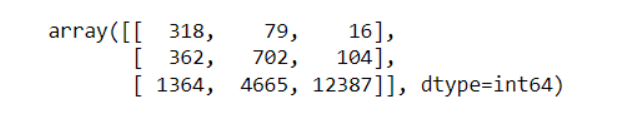

In [120]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred1)

0.709491898379676

In [122]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred1))

              precision    recall  f1-score   support

         0.0       0.15      0.71      0.25       413
         1.0       0.15      0.62      0.25      1168
         2.0       0.99      0.72      0.83     18415

    accuracy                           0.71     19996
   macro avg       0.43      0.68      0.44     19996
weighted avg       0.92      0.71      0.78     19996



In [39]:
## 10 bin no stopworddropping

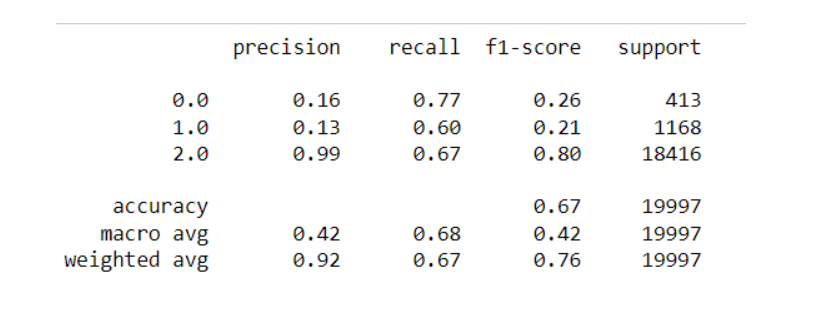